In [1]:
detection_folders = r'\\Desktop-0331tte\d\chiletv-testdata\detection'

In [2]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
columns = ['video_id', 'frame_rate', 'max_frame_size', 'frame_scale', 'width', 'height', 'face_width', 'face_height']

def read_data(path):
    with path.open('r', encoding='utf8') as fp:
        obj = json.load(fp)
    
    if 'frame_scale' not in obj:
        obj['frame_scale'] = int(path.parent.name[1:path.parent.name.index('-')])
    
    obj['video_id'] = path.name[:path.name.index('.')]
    
    bounding_box = [o for o in obj['bounding_box'] if len(o) != 0]
    bounding_box = np.concatenate(bounding_box)
    
    obj['face_width'] = bounding_box[:, 2] - bounding_box[:, 0]
    obj['face_height'] = bounding_box[:, 3] - bounding_box[:, 1]
    
    return [obj[i] for i in columns]
    
data = {}
for folder_path in Path(detection_folders).glob('*'):
    data[folder_path.name] = {k:[] for k in columns}
    for path in folder_path.glob('*.detections.json'):
        for k, v in zip(columns, read_data(path)):
            data[folder_path.name][k].append(v)
    if len(data[folder_path.name]['video_id']) == 0:
        del data[folder_path.name]
    else:
        print(folder_path.name, len(data[folder_path.name]['video_id']))

S1-none@15FPS 62
S1-none@30FPS 112
S1-none@3FPS 133
S1-none@6FPS 94


In [ ]:
full_width = []
full_height = []
full_face_width = []
full_face_height = []
for folder_name, folder_data in data.items():
    full_width.extend(folder_data['width'])
    full_height.extend(folder_data['height'])
    for i in folder_data['face_width']:
        full_face_width.extend(i)
    for i in folder_data['face_height']:
        full_face_height.extend(i)
full_width = np.float32(full_width)
full_height = np.float32(full_height)
full_face_width = np.float32(full_face_width)
full_face_height = np.float32(full_face_height)

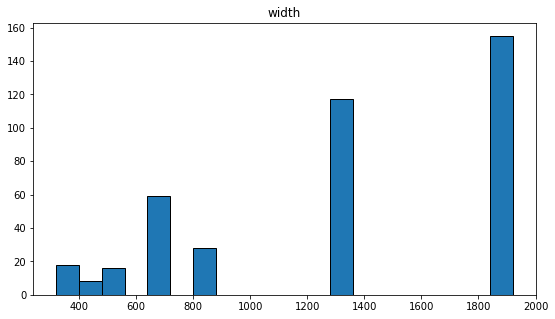

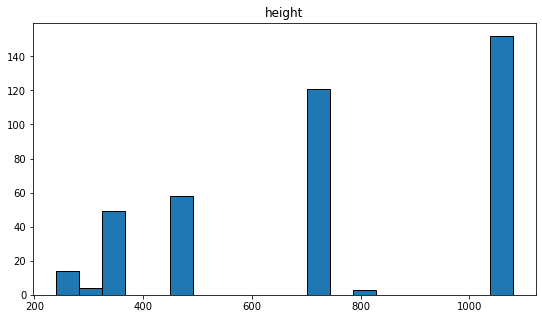

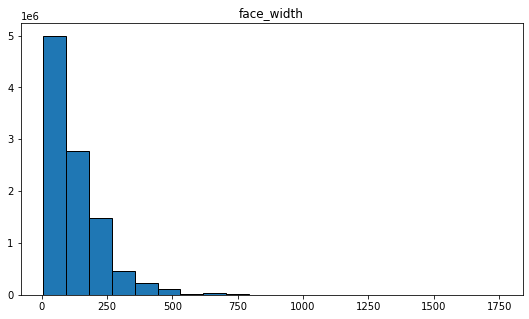

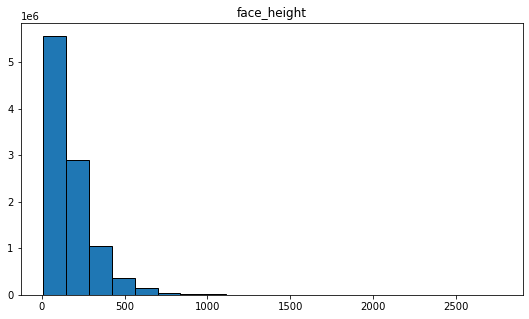

In [13]:
cases = {'width': full_width, 'height': full_height, 'face_width': full_face_width, 'face_height': full_face_height}
for text, arr in cases.items():
    hist, bins = np.histogram(arr, 20)
    
    widths = bins[1:] - bins[:-1]

    fig = plt.figure(figsize=(9, 5))
    plt.bar(bins[:-1], hist, width=widths, edgecolor='black', align='edge')

    plt.title(text)
    # plt.savefig('images/video_dist_length.svg', bbox_inches='tight')
    # plt.savefig('images/video_dist_length.png', bbox_inches='tight')
    plt.show()